## **Análise Sistema de Controle de Estoque**

**Objetivo**: Criar um sistema para gerenciar o estoque de uma loja, incluindo funcionalidades como adicionar, remover e visualizar produtos. Os dados devem ser manipulados com **Pandas** e gráficos sobre a quantidade de produtos em estoque devem ser gerados com **Matplotlib**.

**Critérios de Avaliação**:
- Gerenciamento de Produtos
- Visualização de Estoque
- Interface Gráfica (Tkinter)
- Documentação e Apresentação

**Divisão de Tarefas:**

* Código: Gabrielle Silva Santa Rosa, Maria Clara Magalhães de Sousa, Maria Eduarda Moreira Pascoal;
* Documentação: Melissa Assis dos Santos, Nicolle Santa Rosa Coutinho, Yasmin Ferreira Possiano.
* Apresentação: Ágatha Isabelli Barros da Silva, Héloise Souza Lemos, Lorena Silva Ferreira.


## **Tabelas - Lorena**

### **Descrição do código:**

O código lê três arquivos CSV (`vendas.csv`, `produtos.csv`, `estoque.csv`) usando a biblioteca `pandas` e os armazena em variáveis (`vendas`, `produtos` e `estoque`). Em seguida, ele imprime o conteúdo de cada um desses arquivos no terminal ou console, separando as seções com títulos e linhas para uma visualização mais organizada. A função `pd.read_csv()` é usada para ler os arquivos CSV e transformá-los em DataFrames, que são tabelas estruturadas em formato que o `pandas` consegue manipular facilmente.

Essencialmente, o código importa os dados de vendas, produtos e estoque e os exibe de forma ordenada.




In [1]:
import pandas as pd

vendas = pd.read_csv('vendas.csv')
produtos = pd.read_csv('produtos.csv')
estoque = pd.read_csv('estoque.csv')

print('---------------------------------VENDAS--------------------------------------')
print(vendas)
print('-----------------------------------------------------------------------------')
print('')

print('--------------------------------PRODUTOS-------------------------------------')
print(produtos)
print('-----------------------------------------------------------------------------')
print('')

print('--------------------------------ESTOQUE--------------------------------------')
print(estoque)
print('-----------------------------------------------------------------------------')
print('')

---------------------------------VENDAS--------------------------------------
    id_vendas  id_prod   nome_cliente  qtd_vendas
0           1        1    Maria Clara           2
1           2        2  Maria Eduarda           1
2           3        3      Gabrielle           3
3           4        4        Melissa           5
4           5        5        Heloise           2
5           6        6         Yasmin           3
6           7        7         Lorena           1
7           8        8         Ágatha           4
8           9        9        Nicolle           1
9          10       10    Maria Clara           2
10         11       11  Maria Eduarda           1
11         12       12      Gabrielle           3
-----------------------------------------------------------------------------

--------------------------------PRODUTOS-------------------------------------
    id_prod                    nome_prod  categoria  preco_unitario  \
0         1            Sombras Compactas    

## **Filtros - Gabi**

### **Descrição do código:**

Após ler os código anteriormente *(vendas.csv, produtos.csv, estoque.csv)* usando a biblioteca pandas, e armazena os dados de cada arquivo em variáveis: vendas, produtos e estoque. O código abaixo imprime o conteúdo desses arquivos no console, separando cada seção com um título e uma linha de separação para facilitar a visualização.

*Requisitos:*

- Importar a biblioteca pandas.

- Ler três arquivos CSV e os converter em DataFrames.

- Imprimir o conteúdo dos DataFrames, com títulos e separações visuais.


In [ ]:
import pandas as pd

print("--------------------------Nomes em ordem alfabética-----------------------------------------")
if 'nome_cliente' in vendas.columns:
    nome_ordenados = vendas.sort_values(by="nome_cliente", ascending=True)
    print(nome_ordenados)
else:
    print("Erro: A coluna 'nome_cliente' não existe em 'vendas'.")
print("")

print("--------------------------Preços em ordem crescente-----------------------------------------")
if 'preco_unitario' in produtos.columns:
    preco_ordenados = produtos.sort_values(by="preco_unitario", ascending=True)
    print(preco_ordenados)
else:
    print("Erro: A coluna 'preco_unitario' não existe em 'vendas'.")
print("")

print("----------------------Quantidade de vendas em ordem crescente-------------------------------")
if 'qtd_vendas' in vendas.columns:
    vendas_ordenadas = vendas.sort_values(by="qtd_vendas", ascending=True)
    print(vendas_ordenadas)
else:
    print("Erro: A coluna 'qtd_vendas' não existe em 'vendas'.")
print("")

print("--------------------------Produtos em ordem alfabética--------------------------------------")
if 'nome_prod' in produtos.columns:
    produtos_ordem = produtos.sort_values(by="nome_prod", ascending=True)
    print(produtos_ordem)
else:
    print("Erro: A coluna 'nome_prod' não existe em 'produtos'.")
print("")

if 'preco_unitario' in produtos.columns and 'nome_prod' in produtos.columns:
    filtro_precos = produtos[(produtos['preco_unitario'] > 39) & (produtos['nome_prod'].str.startswith('F'))]
    print("---------------Preço > 39 e nomes de produtos iniciando com a letra F-----------------------")
    print(filtro_precos)
else:
    print("Erro: A coluna 'preco_unitario' ou 'nome_prod' não existe em 'produtos'.")


## **Merge - Gabi e Maria Clara**

### **Gráficos - Maria Clara**

**1 - Quantidade do Estoque por Produto**

**1. Estoque por Produto:** Este bloco calcula a quantidade de itens disponíveis no estoque para cada produto, subtraindo a quantidade de vendas da entrada de produtos. O resultado é agrupado por nome do produto e a quantidade total de itens disponíveis é somada. 

In [ ]:
# QTD DO ESTOQUE POR PRODUTO - BARRA - AZUL
print('--------------------------QTD DO ESTOQUE POR PRODUTO-------------------------')
estoque_final = produtos.merge(vendas, on='id_prod')
estoque_final['itens_disponiveis'] = estoque_final['entrada_produtos'] - estoque_final['qtd_vendas']
total_disponivel_por_produto = estoque_final.groupby('nome_prod')['itens_disponiveis'].sum()
print(total_disponivel_por_produto)
print('-----------------------------------------------------------------------------')
print('')

import matplotlib.pyplot as plt

total_disponivel_por_produto.plot(kind='bar', color='#9bb7d1')
plt.title('Quantidade do Estoque por Produto', color='navy', fontweight='bold')
plt.xlabel('Nome do Produto', color='navy', fontweight='bold')
plt.ylabel('Quantidade do Estoque', color='navy', fontweight='bold')
plt.show()

**2 - Quantidade do Estoque por Categoria**

**2. Estoque por Categoria:** Aqui, o código calcula a quantidade disponível no estoque por categoria de produto. O procedimento é o mesmo que o anterior, mas agora agrupando os dados por categoria em vez de por produto.

In [ ]:
# QTD DO ESTOQUE POR CATEGORIA - DISPERÇÃO - LARANJA
print('-------------------------QTD DO ESTOQUE POR CATEGORIA------------------------')
estoque_final_categoria = produtos.merge(vendas, on='id_prod')
estoque_final_categoria['qtd_disponiveis_categoria'] = estoque_final_categoria['entrada_produtos'] - estoque_final_categoria['qtd_vendas']
total_disponivel_por_categoria = estoque_final_categoria.groupby('categoria')['qtd_disponiveis_categoria'].sum()
print(total_disponivel_por_categoria) #
print('-----------------------------------------------------------------------------')
print('')

import matplotlib.pyplot as plt

x = total_disponivel_por_categoria.index
y = total_disponivel_por_categoria.values
plt.scatter(x, y, color='#ffbd59', marker='o')
plt.title('Quantidade do Estoque por Categoria', color='#ff914d', fontweight='bold')
plt.xlabel('Categoria', color='#ff914d', fontweight='bold')
plt.ylabel('Quantidade do Estoque', color='#ff914d', fontweight='bold')
plt.show()

**3- Porcentagem do Estoque da Categoria Pele**

**3 - Estoque da Categoria Pele:** Aqui executamos o gráfico e não foi preciso usar o merge pois usamos informações de uma única tabela.

In [ ]:
# QTD DO ESTOQUE DOS PRODUTOS CATEGORIA PELE - PIZZA - ROSA
import matplotlib.pyplot as plt

categorias = ['Base Líquida', 'Corretivo em Bastão', 'Pó Compacto']
vendas = [69, 36, 59]
cores = ['#f79489', '#fadcd9', '#f8afa6']

plt.pie(vendas, labels=categorias, autopct='%1.2f%%', colors=cores)
plt.title('Porcentagem do Estoque da Categoria Pele', color='#f66f61', fontweight='bold')
plt.show()

**4 - Valor de Vendas Por Cliente**

**4 - Valor de Vendas por Cliente:** Este trecho calcula o valor total de vendas por cliente. O valor total é calculado multiplicando o preço unitário pelo quantidade de vendas. Em seguida, os valores são somados por cliente. ajuda a entender o comportamento de compra de cada cliente, possibilitando identificar quais clientes geraram mais receita para a empresa.

-------------------------VALOR DE VENDAS POR CLIENTE-------------------------
nome_cliente
Gabrielle        315.0
Heloise           80.0
Lorena            45.0
Maria Clara      140.0
Maria Eduarda     65.0
Melissa          175.0
Nicolle           22.0
Yasmin            60.0
Ágatha           200.0
Name: valor_vendas_final, dtype: float64
-----------------------------------------------------------------------------



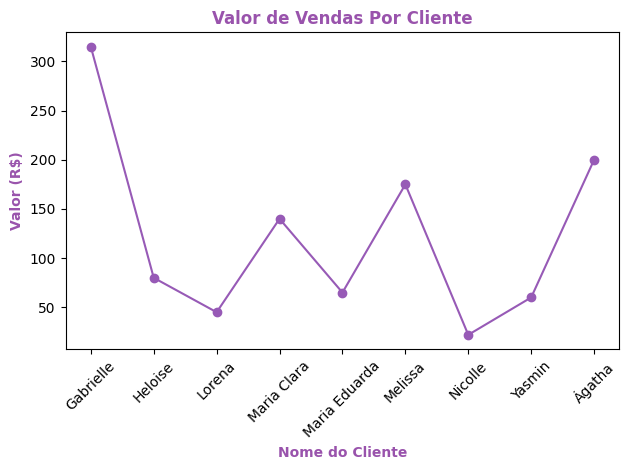

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
vendas = pd.read_csv('vendas.csv')
produtos = pd.read_csv('produtos.csv')
estoque = pd.read_csv('estoque.csv')

# Calcular o valor de vendas por cliente
print('-------------------------VALOR DE VENDAS POR CLIENTE-------------------------')
valor_vendas = vendas.merge(produtos, on='id_prod')
valor_vendas['valor_vendas_final'] = valor_vendas['preco_unitario'] * valor_vendas['qtd_vendas']
valor_vendas_por_produto = valor_vendas.groupby('nome_cliente')['valor_vendas_final'].sum()
print(valor_vendas_por_produto)
print('-----------------------------------------------------------------------------')
print('')

# Visualizar os dados
valor_vendas_por_produto.plot(kind='line', marker='o', color='#975ab6')
plt.title('Valor de Vendas Por Cliente', color='#9953ac', fontweight='bold')
plt.xlabel('Nome do Cliente', color='#9953ac', fontweight='bold')
plt.ylabel('Valor (R$)', color='#9953ac', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

**5 - Entrada Inicial por Produto**

**5 - Entrada Inicial por Produto:** Este bloco calcula a entrada total de produtos por produto, agrupando os dados por nome do produto e somando as entradas. Esse cálculo ajuda a entender o comportamento de compra de cada cliente, possibilitando identificar quais clientes geraram mais receita para a empresa.

In [ ]:
# ENTRADA INICIAL POR PRODUTO - BARRA LATERAL - VERDE
print('-------------------------ENTRADA INICIAL POR PRODUTO-------------------------')
total_entrada = produtos.groupby('nome_prod')['entrada_produtos'].sum()
print(total_entrada)
print('-----------------------------------------------------------------------------')
print('')

import matplotlib.pyplot as plt

total_entrada.plot(kind='barh', color='#81b673', width=0.8)
plt.title('Entrada Inicial por Produto', color='#2c4f40', fontweight='bold')
plt.xlabel('Entrada Inicial', color='#2c4f40', fontweight='bold')
plt.ylabel('Nome do Produto', color='#2c4f40', fontweight='bold')
plt.show()

**6 - Quantidade de Vendas por Produto**

**6 - Quantidade de Vendas por Produto:** Este trecho calcula a quantidade de vendas por produto, ele agrupa as vendas pelo nome do produto de cada produto e soma a quantidade de itens vendidos. Esse cálculo mostra o desempenho de vendas de cada produto, permitindo identificar quais produtos estão vendendo mais ou menos.

In [ ]:
# QTD DE VENDAS POR PRODUTO - BARRA LATERAL - CINZA
print('--------------------------QTD DE VENDAS POR PRODUTO--------------------------')
qtd_vendas_produtos = vendas.merge(produtos, on='id_prod')
qtd_vendas_produtos['valor_vendas'] = qtd_vendas_produtos['qtd_vendas']
total_vendas = qtd_vendas_produtos.groupby('nome_prod')['valor_vendas'].sum()
print(total_vendas)
print('-----------------------------------------------------------------------------')
print('')

import matplotlib.pyplot as plt

vendas = pd.read_csv('vendas.csv')
produtos = pd.read_csv('produtos.csv')
estoque = pd.read_csv('estoque.csv')

total_vendas.plot(kind='barh', color='#a6a6a6', width=0.8)
plt.title('Quantidade de Vendas por Produto', color='#545454', fontweight='bold')
plt.xlabel('Quantidade de Vendas', color='#545454', fontweight='bold')
plt.ylabel('Nome do Produto', color='#545454', fontweight='bold')
plt.show()

**7 - Entrada Inicial - vs - Vendas por Produto**

**7 - Entrada Inicial vs Vendas Por Produto:** Aqui executamos o gráfico e não foi preciso usar o merge pois usamos informações de uma única tabela.

In [ ]:
import matplotlib.pyplot as plt

vendas = pd.read_csv('vendas.csv')
produtos = pd.read_csv('produtos.csv')
estoque = pd.read_csv('estoque.csv')

plt.bar(total_entrada.index, total_entrada.values, color='#d1b59b', width = 0.7, label='Entrada Inicial')
plt.bar(total_vendas.index, total_vendas.values, color='#9d6e42', width = 0.5, label='Vendas')

plt.title('Entrada Inicial - vs - Vendas por Produto', color='#593a1e', fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## **Integrando MatPlotLib com Tkinter (Maria Eduarda)**

### **Descrição do código:**

Esse código cria uma interface gráfica usando o Tkinter para carregar arquivos CSV, realizar análises de dados e gerar gráficos interativos com matplotlib, de maneira visual. O objetivo é analisar e visualizar informações relacionadas a estoque, produtos e vendas.

- A partir desses dados, é gerado gráficos de diferentes tipos (barras, dispersão, pizza e linha) para análise de estoque e vendas, com visualização imediata em novas janelas. A interface é interativa e permite que o usuário selecione os dados e veja os gráficos de forma prática.


In [ ]:
import tkinter as tk 
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Função para carregar arquivos CSV
def carregar_arquivos():
    try:
        # Usando o filedialog para permitir ao usuário selecionar os arquivos
        estoque_path = filedialog.askopenfilename(title="Selecione o arquivo de estoque", filetypes=[("CSV Files", "*.csv")])
        produtos_path = filedialog.askopenfilename(title="Selecione o arquivo de produtos", filetypes=[("CSV Files", "*.csv")])
        vendas_path = filedialog.askopenfilename(title="Selecione o arquivo de vendas", filetypes=[("CSV Files", "*.csv")])

        # Carregar os arquivos CSV
        global vendas, produtos, estoque
        estoque = pd.read_csv(estoque_path)
        produtos = pd.read_csv(produtos_path)
        vendas = pd.read_csv(vendas_path)

        # Exibir as primeiras linhas dos arquivos para verificação
        messagebox.showinfo("Arquivos Carregados", f"Arquivos carregados com sucesso!\nPrimeiras linhas de Vendas:\n{vendas.head()}\n\nPrimeiras linhas de Produtos:\n{produtos.head()}\n\nPrimeiras Linhas Estoque:\n{estoque.head()}")
    except Exception as e:
        messagebox.showerror("Erro", f"Erro ao carregar os arquivos: {e}")


# Função para gerar o gráfico de Quantidade de Estoque por Produto
def grafico_estoque_por_produto():
    try:
        # Merge entre vendas e produtos
        estoque_final = produtos.merge(vendas, on='id_prod')
        # Calcular o Estoque Final
        estoque_final['itens_disponiveis'] = estoque_final['entrada_produtos'] - estoque_final['qtd_vendas']
        total_disponivel_por_produto = estoque_final.groupby('nome_prod')['itens_disponiveis'].sum()

        # Gerar o gráfico de barras de total disponível por produto
        fig, ax = plt.subplots()
        total_disponivel_por_produto.plot(kind='bar', color='#9bb7d1')
        plt.title('Quantidade do Estoque por Produto', color='navy', fontweight='bold')
        plt.xlabel('Nome do Produto', color='navy', fontweight='bold')
        plt.ylabel('Quantidade do Estoque', color='navy', fontweight='bold')

        # Exibir o gráfico em uma nova janela
        nova_janela = tk.Toplevel()
        nova_janela.title("Quantidade do Estoque por Produto")
        canvas = FigureCanvasTkAgg(fig, master=nova_janela)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    except Exception as e:
        messagebox.showerror("Erro", f"Erro ao gerar o gráfico de Total Diponível por Produto: {e}")


# Função para gerar o gráfico de quantidade de estoque por categoria
def qtd_estoque_por_categoria():
    try:
        # Merge entre produtos e vendas
        estoque_final_categoria = produtos.merge(vendas, on='id_prod')

        # Estoque final por categoria
        estoque_final_categoria['qtd_disponiveis_categoria'] = estoque_final_categoria['entrada_produtos'] - estoque_final_categoria['qtd_vendas']
        total_disponivel_por_categoria = estoque_final_categoria.groupby('categoria')['qtd_disponiveis_categoria'].sum()

        # Gerar o gráfico de quantidade de estoque por categoria
        fig, ax = plt.subplots()
        x = total_disponivel_por_categoria.index
        y = total_disponivel_por_categoria.values
        plt.scatter(x, y, color='#ffbd59', marker='o')
        plt.title('Quantidade do Estoque por Categoria', color='#ff914d', fontweight='bold')
        plt.xlabel('Categoria', color='#ff914d', fontweight='bold')
        plt.ylabel('Quantidade do Estoque', color='#ff914d', fontweight='bold')

        # Exibir o gráfico em nova janela
        nova_janela = tk.Toplevel()
        nova_janela.title("Gráfico Quantidade do Estoque por Categoria")
        canvas = FigureCanvasTkAgg(fig, master=nova_janela)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    except Exception as e:
        messagebox.showerror("Erro", f"Erro ao gerar o gráfico de quantidade do estoque por categoria: {e}")


# Função para gerar o gráfico de vendas por categoria
def grafico_vendas_por_categoria():
    try:
        # Gerar o gráfico de pizza para vendas por categoria
        categorias = ['Base Líquida', 'Corretivo em Bastão', 'Pó Compacto']
        vendas = [69, 36, 59]
        cores = ['#f79489', '#fadcd9', '#f8afa6']

        fig, ax = plt.subplots()
        plt.pie(vendas, labels=categorias, autopct='%1.2f%%', colors=cores)
        plt.title('Porcentagem do Estoque da Categoria Pele', color='#f66f61', fontweight='bold')

        # Exibir o gráfico em uma nova janela
        nova_janela = tk.Toplevel()
        nova_janela.title("Gráfico Quantidade do Estoque por Categoria")
        canvas = FigureCanvasTkAgg(fig, master=nova_janela)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    except Exception as e:
        messagebox.showerror("Erro", f"Erro ao gerar o gráfico de vendas por categoria: {e}")


# Função para gerar valor de vendas por cliente 
def grafico_vendas_por_cliente():
    try:
        # Merge entre vendas e produtos
        valor_vendas = vendas.merge(produtos, on='id_prod')
        
        # Calcular o valor de vendas
        valor_vendas['valor_vendas_final'] = valor_vendas['preco_unitario'] * valor_vendas['qtd_vendas']
        valor_vendas_por_produto = valor_vendas.groupby('nome_cliente')['valor_vendas_final'].sum()

        # Gerar o gráfico de valor de vendas por cliente
        fig, ax = plt.subplots()
        valor_vendas_por_produto.plot(kind='line', marker='o', color='#975ab6')
        plt.title('Valor de Vendas Por Cliente', color='#9953ac', fontweight='bold')
        plt.xlabel('Nome do Cliente', color='#9953ac', fontweight='bold')
        plt.ylabel('Valor (R$)', color='#9953ac', fontweight='bold')
        plt.xticks(rotation=45)

        # Exibir o gráfico em uma nova janela
        nova_janela = tk.Toplevel()
        nova_janela.title("Gráfico Valor Vendas por Cliente")
        canvas = FigureCanvasTkAgg(fig, master=nova_janela)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    except Exception as e:
        messagebox.showerror("Erro", f"Erro ao gerar o gráfico de Valor de Vendas por Cliente: {e}")


# Função para gerar o gráfico de Entrada Inicial por Produto
def grafico_entrada_inicial_por_produto():
    try:
        # Gráfico de entrada inicial
        total_entrada = produtos.groupby('nome_prod')['entrada_produtos'].sum()

        # Gerar o gráfico de entrada inicial por produto
        fig, ax = plt.subplots()
        total_entrada.plot(kind='barh', color='#81b673', width=0.8)
        plt.title('Entrada Inicial por Produto', color='#2c4f40', fontweight='bold')
        plt.xlabel('Entrada Inicial', color='#2c4f40', fontweight='bold')
        plt.ylabel('Nome do Produto', color='#2c4f40', fontweight='bold')
        plt.show()

        # Exibir o gráfico em uma nova janela
        nova_janela = tk.Toplevel()
        nova_janela.title("Entrada Inicial por Produto")
        canvas = FigureCanvasTkAgg(fig, master=nova_janela)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    except Exception as e:
        messagebox.showerror("Erro", f"Erro ao gerar o gráfico de Entrada Inicial por Produto: {e}")


# Função para gerar o gráfico de Quantidade de Vendas por Produto
def grafico_vendas_por_produto():
    try:
        # Merge entre vendas e produtos
        qtd_vendas_produtos = vendas.merge(produtos, on='id_prod')
        # Calcular o Estoque Final
        qtd_vendas_produtos['valor_vendas'] = qtd_vendas_produtos['qtd_vendas']
        total_vendas = qtd_vendas_produtos.groupby('nome_prod')['valor_vendas'].sum()

        # Gerar o gráfico de quantidade de vendas por produto
        fig, ax = plt.subplots()
        total_vendas.plot(kind='barh', color='#a6a6a6', width=0.8)
        plt.title('Quantidade de Vendas por Produto', color='#545454', fontweight='bold')
        plt.xlabel('Quantidade de Vendas', color='#545454', fontweight='bold')
        plt.ylabel('Nome do Produto', color='#545454', fontweight='bold')

        # Exibir o gráfico em uma nova janela
        nova_janela = tk.Toplevel()
        nova_janela.title("Quantidade de Vendas por Produto")
        canvas = FigureCanvasTkAgg(fig, master=nova_janela)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    except Exception as e:
        messagebox.showerror("Erro", f"Erro ao gerar o gráfico de Quantidade de Vendas por Produto: {e}")


# Configuração da Janela Principal
root = tk.Tk()
root.title("Análise de Estoque")
root.geometry("800x600")

# Label para o título
titulo = tk.Label(root, text="Análise de Estoque", font=("Georgia", 24, "bold"), fg="#7B1D26")
titulo.pack(pady=80, padx=20, side="top", anchor="n") # Adiciona o título no topo e com algum espaço


# Frame para centralizar os botões
frame = tk.Frame(root)
frame.place(relx=0.5, rely=0.5, anchor="center")  # Centraliza o Frame na janela

# Botão para carregar os arquivos CSV
bnt_carregar = tk.Button(frame, text="Carregar Arquivos", command=carregar_arquivos, bg="#D38C9D", fg="black", font=("cambria", 10))
bnt_carregar.pack(pady=10)

# Botões para gerar os gráficos
bnt_total_disponivel_por_produtos = tk.Button(frame, text="Gráfico de Estoque por Produto", command=grafico_estoque_por_produto, bg="#D38C9D", fg="black", font=("cambria", 10))
bnt_total_disponivel_por_produtos.pack(pady=10)

bnt_qtd_estoque_por_categoria = tk.Button(frame, text="Gráfico de Quantidade de Estoque por Categoria", command=qtd_estoque_por_categoria, bg="#D38C9D", fg="black", font=("cambria", 10))
bnt_qtd_estoque_por_categoria.pack(pady=10)

bnt_vendas_categoria = tk.Button(frame, text="Gráfico de Vendas por Categoria", command=grafico_vendas_por_categoria, bg="#D38C9D", fg="black", font=("cambria", 10))
bnt_vendas_categoria.pack(pady=10)

bnt_vendas_por_cliente = tk.Button(frame, text="Gráfico de Vendas por Cliente", command=grafico_vendas_por_cliente, bg="#D38C9D", fg="black", font=("cambria", 10))
bnt_vendas_por_cliente.pack(pady=10)

bnt_entrada_inicial_por_produto = tk.Button(frame, text="Gráfico de Entrada Inicial por Produto", command=grafico_entrada_inicial_por_produto, bg="#D38C9D", fg="black", font=("cambria", 10))
bnt_entrada_inicial_por_produto.pack(pady=10)

bnt_total_disponivel_por_produto = tk.Button(frame, text="Gráfico de Vendas por Produto", command=grafico_vendas_por_produto, bg="#D38C9D", fg="black", font=("cambria", 10))
bnt_total_disponivel_por_produto.pack(pady=10)

# Iniciar a interface
root.mainloop()
